In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv

In [3]:
df = pd.read_csv('Dados Município Simplificado (1).csv')

In [4]:
df.head(30)

,Código do Município,Nome do Município,Código da UF,Unidade da Federação,Região,Ioeb,Ano do Ioeb,Insumos do Ioeb,Resultados do Ioeb,Total de Matrículas,População,Categoria do Quadrante
0,3304524,Rio das Ostras,33,RJ,Sudeste,"5,4",2023,"1,0","4,3",35.555,150.674,OTIMIZADO
1,3300159,Aperibé,33,RJ,Sudeste,"5,2",2023,"1,2","4,0",1.973,11.759,ATENÇÃO
2,3300951,Comendador Levy Gasparian,33,RJ,Sudeste,"5,2",2023,"1,1","4,1",2.030,8.561,OTIMIZADO
3,3302205,Itaperuna,33,RJ,Sudeste,"5,2",2023,"1,2","4,0",20.919,103.224,ATENÇÃO
4,3303005,Miracema,33,RJ,Sudeste,"5,2",2023,"0,9","4,3",5.735,27.174,OTIMIZADO
5,3304201,Resende,33,RJ,Sudeste,"5,2",2023,"1,2","3,9",29.748,131.341,OTIMIZADO
6,3304557,Rio de Janeiro,33,RJ,Sudeste,"5,2",2023,"1,2","4,1",1.279.679,6.718.903,ATENÇÃO
7,3300902,Cambuci,33,RJ,Sudeste,"5,1",2023,"1,2","3,8",2.523,15.505,OTIMIZADO
8,3302106,Itaocara,33,RJ,Sudeste,"5,1",2023,"1,0","4,1",4.669,23.234,OTIMIZADO
9,3304706,Santo Antônio de Pádua,33,RJ,Sudeste,"5,1",2023,"0,9","4,2",8.859,42.479,OTIMIZADO


In [5]:
info_df = df.info()

print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Código do Município     92 non-null     int64 
 1   Nome do Município       92 non-null     object
 2   Código da UF            92 non-null     int64 
 3   Unidade da Federação    92 non-null     object
 4   Região                  92 non-null     object
 5   Ioeb                    92 non-null     object
 6   Ano do Ioeb             92 non-null     int64 
 7   Insumos do Ioeb         92 non-null     object
 8   Resultados do Ioeb      92 non-null     object
 9   Total de Matrículas     92 non-null     object
 10  População               92 non-null     object
 11  Categoria do Quadrante  92 non-null     object
dtypes: int64(3), object(9)
memory usage: 8.8+ KB
None


In [6]:
df['Ioeb'] = df['Ioeb'].replace({',': ''}, regex=True).astype(float)

In [7]:
print(df.dtypes)

Código do Município         int64
Nome do Município          object
Código da UF                int64
Unidade da Federação       object
Região                     object
Ioeb                      float64
Ano do Ioeb                 int64
Insumos do Ioeb            object
Resultados do Ioeb         object
Total de Matrículas        object
População                  object
Categoria do Quadrante     object
dtype: object


In [8]:
df.head(30)

,Código do Município,Nome do Município,Código da UF,Unidade da Federação,Região,Ioeb,Ano do Ioeb,Insumos do Ioeb,Resultados do Ioeb,Total de Matrículas,População,Categoria do Quadrante
0,3304524,Rio das Ostras,33,RJ,Sudeste,54.0,2023,"1,0","4,3",35.555,150.674,OTIMIZADO
1,3300159,Aperibé,33,RJ,Sudeste,52.0,2023,"1,2","4,0",1.973,11.759,ATENÇÃO
2,3300951,Comendador Levy Gasparian,33,RJ,Sudeste,52.0,2023,"1,1","4,1",2.030,8.561,OTIMIZADO
3,3302205,Itaperuna,33,RJ,Sudeste,52.0,2023,"1,2","4,0",20.919,103.224,ATENÇÃO
4,3303005,Miracema,33,RJ,Sudeste,52.0,2023,"0,9","4,3",5.735,27.174,OTIMIZADO
5,3304201,Resende,33,RJ,Sudeste,52.0,2023,"1,2","3,9",29.748,131.341,OTIMIZADO
6,3304557,Rio de Janeiro,33,RJ,Sudeste,52.0,2023,"1,2","4,1",1.279.679,6.718.903,ATENÇÃO
7,3300902,Cambuci,33,RJ,Sudeste,51.0,2023,"1,2","3,8",2.523,15.505,OTIMIZADO
8,3302106,Itaocara,33,RJ,Sudeste,51.0,2023,"1,0","4,1",4.669,23.234,OTIMIZADO
9,3304706,Santo Antônio de Pádua,33,RJ,Sudeste,51.0,2023,"0,9","4,2",8.859,42.479,OTIMIZADO


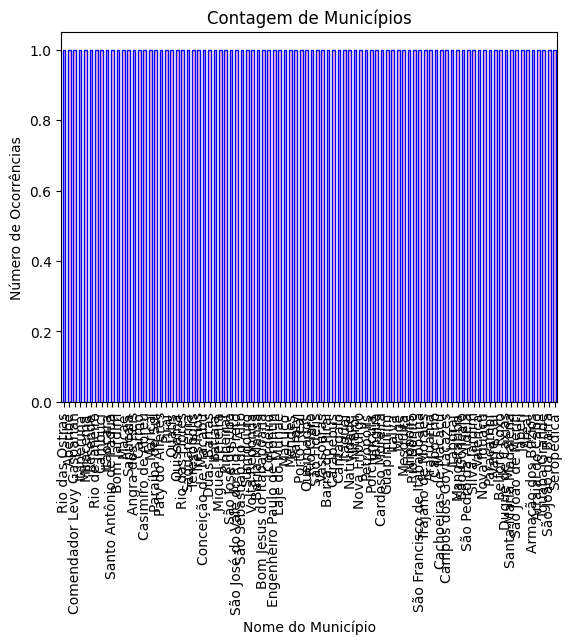

In [9]:
#Quantos municipios foram avaliados?

import matplotlib.pyplot as plt

# Contar o número de ocorrências de cada nome de município
contagem_municipios = df["Nome do Município"].value_counts()

# Plotar o gráfico
contagem_municipios.plot(kind="bar", edgecolor="blue", color="pink")

plt.title("Contagem de Municípios")
plt.xlabel("Nome do Município")
plt.ylabel("Número de Ocorrências")

# Mostrar o gráfico
plt.show()

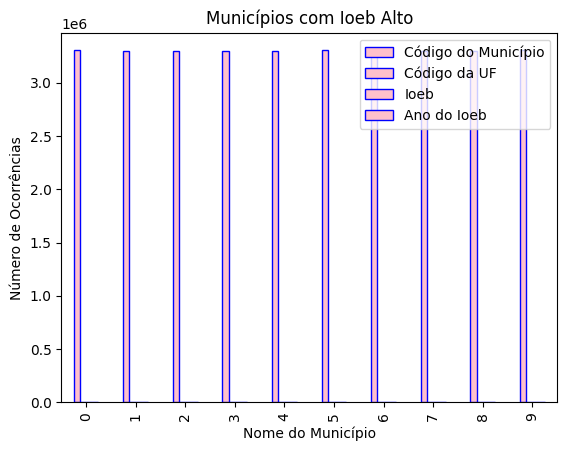

In [10]:
# Quais municípios estão entre 50 e 54?

valor_ioeb_alto = df[df["Ioeb"].astype(float) > 50]

# Plotar o gráfico
valor_ioeb_alto.plot(kind="bar", edgecolor="blue", color="pink")

plt.title("Municípios com Ioeb Alto")
plt.xlabel("Nome do Município")
plt.ylabel("Número de Ocorrências")

# Mostrar o gráfico
plt.show()


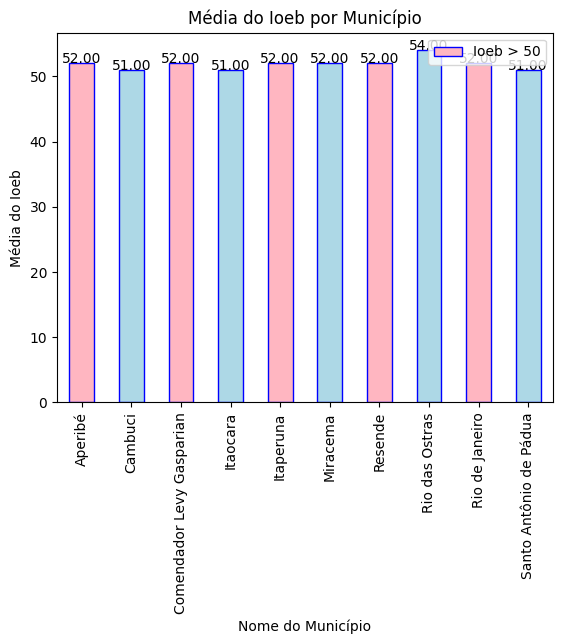

In [11]:

# Calcular a média de Ioeb por município
municipio_ioeb = df.groupby("Nome do Município")["Ioeb"].mean()

# Filtrar os municípios com média de Ioeb maior que 50
municipios_alto_ioeb = municipio_ioeb[municipio_ioeb > 50]

# Definir cores e plotar o gráfico
cores = ["lightpink", "lightblue"]  # Verifique se o número de cores corresponde ao número de barras
barras = municipios_alto_ioeb.plot.bar(edgecolor="blue", color=cores)

# Adicionar rótulos aos eixos e título
plt.xlabel("Nome do Município")
plt.ylabel("Média do Ioeb")
plt.title("Média do Ioeb por Município")

# Adicionar legendas (opcional, ajuste conforme necessário)
plt.legend(["Ioeb > 50"], loc='upper right')

# Adicionar rótulos nas barras
for i, v in enumerate(municipios_alto_ioeb):
    barras.text(i, v + 0.01, f'{v:.2f}', color='black', ha='center')

plt.show()


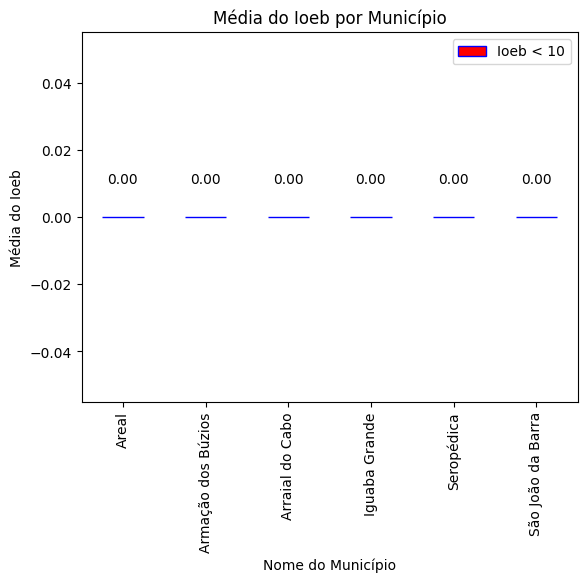

In [12]:

# Calcular a média de Ioeb por município
municipio_ioeb = df.groupby("Nome do Município")["Ioeb"].mean()

# Filtrar os municípios com média de Ioeb maior que 50
municipios_alto_ioeb = municipio_ioeb[municipio_ioeb < 10]

# Definir cores e plotar o gráfico
cores = ["red", "purple"]  # Verifique se o número de cores corresponde ao número de barras
barras = municipios_alto_ioeb.plot.bar(edgecolor="blue", color=cores)

# Adicionar rótulos aos eixos e título
plt.xlabel("Nome do Município")
plt.ylabel("Média do Ioeb")
plt.title("Média do Ioeb por Município")

# Adicionar legendas (opcional, ajuste conforme necessário)
plt.legend(["Ioeb < 10"], loc='upper right')

# Adicionar rótulos nas barras
for i, v in enumerate(municipios_alto_ioeb):
    barras.text(i, v + 0.01, f'{v:.2f}', color='black', ha='center')

plt.show()